<a href="https://colab.research.google.com/github/joanby/python-ml-course/blob/Collab---v-3.8/notebooks/T2%20-%203%20-%20Data%20Cleaning%20-%20Agrupaci%C3%B3n%20de%20datos.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Agregación de datos por categoría

In [73]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [74]:
import numpy as np
import pandas as pd

In [75]:
gender = ["Male", "Female"]
income = ["Poor", "Middle Class", "Rich"]

In [76]:
n = 500

gender_data = []
income_data = []

for i in range(0,500):
    gender_data.append(np.random.choice(gender))
    income_data.append(np.random.choice(income))

In [77]:
gender_data[1:10]

['Male',
 'Female',
 'Female',
 'Male',
 'Female',
 'Male',
 'Female',
 'Male',
 'Male']

In [78]:
income_data[1:10]

['Rich',
 'Poor',
 'Rich',
 'Rich',
 'Poor',
 'Middle Class',
 'Poor',
 'Poor',
 'Poor']

In [79]:
#Z -> N(0,1)
#N(m, s) -> m + s * Z
height = 160 + 30 * np.random.randn(n)
weight = 65 + 25 * np.random.randn(n)
age = 30 + 12 * np.random.randn(n)
income = 18000 + 3500 * np.random.rand(n)


In [ ]:
### INCISO ####
# SI QUIERO QUE ALGUNA LISTA NO TENGA DECIMALES, APLICO ESTO: (ojo, acabo de transformar los datos en strings)
# birdies_per_round_raw = 2 + 1*np.random.randn(n)
# birdies_per_round = ["%.0f" % elem for elem in birdies_per_round_raw]

# si quiero que alguna lista no tenga negativos, aplico esto: (primero los paso a int)

# birdies_per_round=[int(x) for x in birdies_per_round_rounded]
# for x in range(len(birdies_per_round)):
    # if birdies_per_round[x]<0:
        # birdies_per_round[x]=0

# tambien puedo tener una lista con positivos y con dos decimales:
# income_per_tournament_raw=25000 + 5000*np.random.randn(n)
# income_per_tournament_rounded = ["%.2f" % elem for elem in income_per_tournament_raw]
# income_per_tournament = [round(float(s),2) for s in income_per_tournament_rounded]

In [80]:
data = pd.DataFrame(
    {
        "Gender" : gender_data,
        "Economic Status" : income_data,
        "Height" : height,
        "Weight" : weight,
        "Age" : age,
        "Income" : income
    }
)

In [81]:
data.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,127.203517,69.215483,32.428991,19648.758753
1,Male,Rich,167.884349,70.759233,19.693462,18653.150416
2,Female,Poor,146.454854,10.471652,36.466649,19030.564172
3,Female,Rich,128.920765,16.235337,30.475127,18499.282680
4,Male,Rich,103.143576,50.851294,19.859256,19790.322291
5,Female,Poor,138.748318,74.103914,25.502735,19158.210094
6,Male,Middle Class,181.041035,86.550493,50.816711,19647.535995
7,Female,Poor,110.908118,70.808051,24.412155,21206.116334
8,Male,Poor,160.662211,58.729202,26.265761,19228.652189
9,Male,Poor,231.714218,70.281656,25.025433,19553.113955


## Agrupación de datos

In [82]:
grouped_gender = data.groupby("Gender")

In [ ]:
grouped_gender.groups

In [ ]:
for names, groups in grouped_gender:
    print(names)
    print(groups)

In [ ]:
grouped_gender.get_group("Female")

In [86]:
double_group = data.groupby(["Gender", "Economic Status"])

In [ ]:
len(double_group)

In [ ]:
for names, groups in double_group:
    print(names)
    print(groups)

## Operaciones sobre datos agrupados

In [ ]:
double_group.sum()

In [ ]:
double_group.mean()

In [ ]:
double_group.size()

In [ ]:
double_group.describe()

In [93]:
grouped_income = double_group["Income"]

In [94]:
grouped_income.describe()

count          mean          std           min  \
Gender Economic Status                                                   
Female Middle Class      85.0  19902.814675  1065.589360  18056.430014   
       Poor              83.0  19970.211660   997.378232  18141.428544   
       Rich              90.0  19867.397655  1055.027838  18004.988873   
Male   Middle Class      89.0  19560.711432  1037.053216  18030.623078   
       Poor              84.0  19667.310972  1010.905518  18004.175204   
       Rich              69.0  19883.245116  1044.518571  18015.795903   

                                 25%           50%           75%           max  
Gender Economic Status                                                          
Female Middle Class     19008.542255  19862.590115  20904.768771  21494.832022  
       Poor             19077.048781  20147.187329  20802.517870  21478.101241  
       Rich             18909.888381  19994.067533  20757.333198  21478.447017  
Male   Middle Class     18642.170712  19512.754363  20424.913736  21416.252127  
       Poor             18934.947897  19562.114866  20644.544323  21480.400181  
       Rich             18837.289177  20141.825054  20714.856481  21480.769753

In [95]:
double_group.aggregate(
    {
        "Income": np.sum,
        "Age" : np.mean,
        "Height" : np.std
    }
)

Income        Age     Height
Gender Economic Status                                    
Female Middle Class     1.691739e+06  29.860532  30.252595
       Poor             1.657528e+06  33.121041  30.191741
       Rich             1.788066e+06  30.383067  28.917097
Male   Middle Class     1.740903e+06  28.088854  29.755134
       Poor             1.652054e+06  29.620558  30.424737
       Rich             1.371944e+06  29.176197  27.023479

In [96]:
double_group.aggregate(
    {
        "Age" : np.mean,
        "Height" : lambda h:(np.mean(h))/np.std(h)
    }
)

Age    Height
Gender Economic Status                     
Female Middle Class     29.860532  5.267770
       Poor             33.121041  5.256741
       Rich             30.383067  5.619131
Male   Middle Class     28.088854  5.335992
       Poor             29.620558  5.380801
       Rich             29.176197  5.842454

In [97]:
double_group.aggregate([np.sum, np.mean, np.std])

Height                              Weight  \
                                 sum        mean        std          sum   
Gender Economic Status                                                     
Female Middle Class     13465.998221  158.423508  30.252595  5514.807698   
       Poor             13093.349185  157.751195  30.191741  5288.474173   
       Rich             14542.535331  161.583726  28.917097  6067.011835   
Male   Middle Class     14051.200558  157.878658  29.755134  5979.615169   
       Poor             13669.494790  162.732081  30.424737  5210.726796   
       Rich             10814.727538  156.735182  27.023479  4484.192214   

                                                      Age             \
                             mean        std          sum       mean   
Gender Economic Status                                                 
Female Middle Class     64.880091  25.393567  2538.145225  29.860532   
       Poor             63.716556  23.327597  2749.046386  33.121041   
       Rich             67.411243  25.203679  2734.476058  30.383067   
Male   Middle Class     67.186687  24.026521  2499.908005  28.088854   
       Poor             62.032462  25.092825  2488.126834  29.620558   
       Rich             64.988293  26.503139  2013.157564  29.176197   

                                         Income                             
                              std           sum          mean          std  
Gender Economic Status                                                      
Female Middle Class     13.106281  1.691739e+06  19902.814675  1065.589360  
       Poor             12.600480  1.657528e+06  19970.211660   997.378232  
       Rich             10.843517  1.788066e+06  19867.397655  1055.027838  
Male   Middle Class     12.455337  1.740903e+06  19560.711432  1037.053216  
       Poor             11.320531  1.652054e+06  19667.310972  1010.905518  
       Rich             12.508141  1.371944e+06  19883.245116  1044.518571

In [98]:
double_group.aggregate([lambda x: np.mean(x) / np.std(x)])

Height    Weight       Age     Income
                        <lambda>  <lambda>  <lambda>   <lambda>
Gender Economic Status                                         
Female Middle Class     5.267770  2.570145  2.291859  18.788601
       Poor             5.256741  2.747985  2.644533  20.144426
       Rich             5.619131  2.689643  2.817654  18.936657
Male   Middle Class     5.335992  2.812199  2.267943  18.968687
       Poor             5.380801  2.486967  2.632249  19.571991
       Rich             5.842454  2.470062  2.349665  19.175257

## Filtrado de datos

In [122]:
double_group["Age"].filter(lambda x: x.sum()>2400)

2      36.466649
3      30.475127
5      25.502735
6      50.816711
7      24.412155
         ...    
494    33.694522
495    38.799318
496    53.329782
497    29.647644
499    43.918036
Name: Age, Length: 431, dtype: float64

## Transformación de variables

In [123]:
zscore = lambda x : (x - x.mean())/x.std()

In [124]:
z_group = double_group.transform(zscore)

In [125]:
import matplotlib.pyplot as plt

(array([  8.,  16.,  53.,  88.,  93., 114.,  68.,  40.,  12.,   8.]),
 array([-2.73108899, -2.17189459, -1.61270019, -1.05350579, -0.49431139,
         0.06488301,  0.62407741,  1.18327181,  1.74246621,  2.30166061,
         2.86085501]),
 <BarContainer object of 10 artists>)

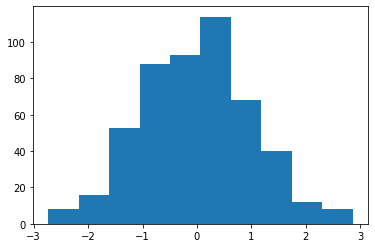

In [126]:
plt.hist(z_group["Age"])

In [127]:
fill_na_mean = lambda x : x.fillna(x.mean())

In [105]:
double_group.transform(fill_na_mean)

,Height,Weight,Age,Income
0,127.203517,69.215483,32.428991,19648.758753
1,167.884349,70.759233,19.693462,18653.150416
2,146.454854,10.471652,36.466649,19030.564172
3,128.920765,16.235337,30.475127,18499.282680
4,103.143576,50.851294,19.859256,19790.322291
...,...,...,...,...
495,210.588025,68.418876,38.799318,21454.069931
496,160.767503,117.746708,53.329782,21460.002997
497,203.046115,53.135075,29.647644,18905.863458
498,136.292740,79.874115,38.438401,19772.762161


## Operaciones diversas muy útiles

In [106]:
# nos devuelve la primera fila de cada uno (male-rich, male-middle class, male-poor, female....)
double_group.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
0,Male,Rich,127.203517,69.215483,32.428991,19648.758753
2,Female,Poor,146.454854,10.471652,36.466649,19030.564172
3,Female,Rich,128.920765,16.235337,30.475127,18499.282680
6,Male,Middle Class,181.041035,86.550493,50.816711,19647.535995
8,Male,Poor,160.662211,58.729202,26.265761,19228.652189
13,Female,Middle Class,160.220587,70.170994,25.056576,19888.101975


In [107]:
double_group.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
486,Female,Middle Class,111.943480,93.768161,-0.748062,20680.509051
491,Male,Poor,171.372400,99.548481,21.996581,18134.050382
496,Female,Poor,160.767503,117.746708,53.329782,21460.002997
497,Female,Rich,203.046115,53.135075,29.647644,18905.863458
498,Male,Rich,136.292740,79.874115,38.438401,19772.762161
499,Male,Middle Class,157.007616,41.769997,43.918036,18186.888552


In [128]:
double_group.nth(32)

Height     Weight        Age        Income
Gender Economic Status                                                
Female Middle Class     173.136817  28.504397  39.419014  21459.986339
       Poor             192.337314  40.616651  28.513449  19858.348677
       Rich             175.893237  83.491252  27.488457  19605.780098
Male   Middle Class     139.961935  86.013017  18.697583  20729.484556
       Poor             218.113468  34.890016  33.226729  19056.553852
       Rich             140.482303  88.664169  21.022119  19337.195899

In [129]:
double_group.nth(82)

Height      Weight        Age        Income
Gender Economic Status                                                 
Female Middle Class     130.888554   74.788818  20.332662  18933.456712
       Poor             160.767503  117.746708  53.329782  21460.002997
       Rich             160.760821   38.118068  41.627463  21392.279423
Male   Middle Class     194.321907    8.793921   9.115875  18337.873934
       Poor             158.302698   44.839569  37.659257  19456.943417

In [110]:
# las ordeno primero por age y luego, en caso de empate, por income
data_sorted = data.sort_values(["Age", "Income"])

In [111]:
data_sorted.head(10)

,Gender,Economic Status,Height,Weight,Age,Income
314,Female,Middle Class,208.506676,103.799324,-5.933889,18150.650769
284,Male,Middle Class,136.544754,103.249849,-1.058571,19293.708120
486,Female,Middle Class,111.943480,93.768161,-0.748062,20680.509051
268,Female,Middle Class,97.321295,48.756670,-0.194966,21494.832022
291,Male,Middle Class,200.591290,84.632456,1.439561,18659.482596
307,Female,Middle Class,141.502283,43.942368,1.474611,19680.720448
151,Male,Middle Class,79.958024,96.570706,1.829585,18795.061865
186,Male,Poor,169.042587,68.340318,1.893487,19034.936486
80,Male,Poor,96.909984,67.010968,3.927711,18574.830566
37,Male,Poor,140.963577,63.537621,4.020471,18283.629417


In [112]:
age_grouped = data_sorted.groupby("Gender")

In [113]:
age_grouped.head(1)

,Gender,Economic Status,Height,Weight,Age,Income
314,Female,Middle Class,208.506676,103.799324,-5.933889,18150.650769
284,Male,Middle Class,136.544754,103.249849,-1.058571,19293.708120


In [114]:
age_grouped.tail(1)

,Gender,Economic Status,Height,Weight,Age,Income
456,Female,Poor,163.816930,72.095923,62.255662,18919.038056
396,Male,Rich,157.406847,74.894447,63.356678,20016.895605


# Conjunto de entrenamiento y conjunto de testing

En vez de utilizar la librería que  ya no existe:

`from sklearn.cross_validation import train_test_split`

ahora hay que utilizar:

`from sklearn.model_selection import train_test_split`

También, cuidado si quieres representar un vector de variables booleanas, ya que al hacer un histograma obtendrás un error. 
Ahora debes añadir un casting con `.astype(int)` al final de la lista de python para poderlo representar.

Antes: 

`plt.hist(check)`

Ahora 

`plt.hist(check.astype(int))`

In [131]:
import pandas as pd

In [132]:
data = pd.read_csv("/content/drive/MyDrive/Python Machine Learning JGG/datasets/customer-churn-model/Customer Churn Model.txt")

In [133]:
len(data)

3333

## Dividir utilizando la distribución normal

In [119]:
a = np.random.randn(len(data))

(array([ 16.,  79., 227., 504., 805., 837., 537., 235.,  80.,  13.]),
 array([-3.19660184, -2.55627205, -1.91594227, -1.27561249, -0.63528271,
         0.00504708,  0.64537686,  1.28570664,  1.92603643,  2.56636621,
         3.20669599]),
 <BarContainer object of 10 artists>)

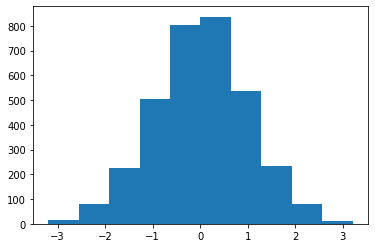

In [120]:
plt.hist(a)

In [145]:
check = (a<0.75) # No es el 75% de los datos, son los números que son < 0.75!!! 

In [146]:
check

array([ True,  True,  True, ...,  True,  True,  True])

(array([ 770.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,    0.,
        2563.]),
 array([0. , 0.1, 0.2, 0.3, 0.4, 0.5, 0.6, 0.7, 0.8, 0.9, 1. ]),
 <BarContainer object of 10 artists>)

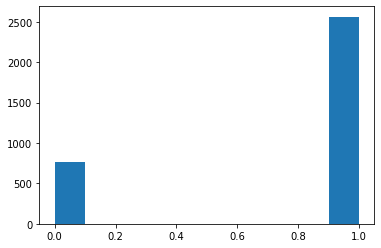

In [147]:
plt.hist(check.astype(int))#Ha cambiado en la versión 3.7 de python y necesita hacer un cast de bool a entero

In [148]:
# ~ se hace con (alt_gr + 4)
training = data[check]
testing = data[~check]

In [149]:
len(training)

2563

In [150]:
len(testing)

770

## Con la libreria sklearn

In [152]:
from sklearn.model_selection import train_test_split    # Ha cambiado en la 3.7 de Python

In [153]:
train, test = train_test_split(data, test_size = 0.2) # 20% del dataframe va al testing

In [154]:
len(train)

2666

In [155]:
len(test)

667

## Usando una función de shuffle

In [156]:
import numpy as np

In [157]:
data.head()

,State,Account Length,Area Code,Phone,Int'l Plan,VMail Plan,VMail Message,Day Mins,Day Calls,Day Charge,...,Eve Calls,Eve Charge,Night Mins,Night Calls,Night Charge,Intl Mins,Intl Calls,Intl Charge,CustServ Calls,Churn?
0,KS,128,415,382-4657,no,yes,25,265.1,110,45.07,...,99,16.78,244.7,91,11.01,10.0,3,2.70,1,False.
1,OH,107,415,371-7191,no,yes,26,161.6,123,27.47,...,103,16.62,254.4,103,11.45,13.7,3,3.70,1,False.
2,NJ,137,415,358-1921,no,no,0,243.4,114,41.38,...,110,10.30,162.6,104,7.32,12.2,5,3.29,0,False.
3,OH,84,408,375-9999,yes,no,0,299.4,71,50.90,...,88,5.26,196.9,89,8.86,6.6,7,1.78,2,False.
4,OK,75,415,330-6626,yes,no,0,166.7,113,28.34,...,122,12.61,186.9,121,8.41,10.1,3,2.73,3,False.


In [158]:
import sklearn

In [159]:
data = sklearn.utils.shuffle(data)

In [166]:
cut_id = int(0.75*len(data))
train_data = data[:cut_id]
test_data = data[cut_id+1:]

In [167]:
len(train_data)

2499

In [168]:
len(test_data)

833